# 변수

- 데이터의 저장하는 공간의 이름
> 전역변수
- 어디서든 사용할 수 있는 변수
> 지역변수
- 특정한 영역에서 사용할 수 있는 변수
- 영역을 벗어나면 사용이 불가능
> 매개변수
- 함수에서 특정한 인자값을 받아오기 위한 변수
> 클래스 변수
- 하나의 클래스에서 독립적이지 않고 공유하는 변수


In [1]:
a=10
b='test'
print(a)
print(b)

10
test


# 경로(절대 경로 / 상대 경로)
> 절대 경로
- 절대적인 주소
- 환경에 상관 없이 고정된 위치를 표현
- ex) "c\users\document", "http://www.gogle.com"
> 상대 주소
- 상대적인 주소
- 환경에 따라서 주소가 변화
- 현재 작업인 디렉토리에서 이동한다
- ex) 
    - 현재 디렉토리: ./
    - 상위 디렉토리: ../
    - 하위 디렉토리: ./폴더명/
    - 상위에서 상위로 한번더 이동: ../../

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import platform
# 그래프에서 한글 깨짐 방지
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')


In [3]:
# 상위 폴더에서 csv 폴더 안에 sales records.csv 폴더 로드
# 상대 경로
df=pd.read_csv("../csv/Sales Records.csv")
# 절대 경로
pd.read_csv("C:\\Users\\dgh06\\OneDrive\\문서\\GitHub\\python-work\\csv\\Sales Records.csv").head(1)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.0


## 문제

1. Region, Country, Sales Channel, Unit Sold, Unit Price, Unit Cost컬럼만 추출
2. 컬럼의 이름을 권역,국가,판매채널,판매개수,단가,원가로 변경
3. 총단가,총원가, 총이윤을 이라는 파생변수 생성
4. 권역별 총이윤의 평균을 그래프로 표시(바 그래프)
5. 권역별 판매채널에 따른 총이윤의 합계를 그래프로 표시(바 그래프)

In [4]:
# 결측치를 확인하는 방법
# isna.sum()  --> 결측치의 개수를 확인
# isna(): 결측치인 경우에는 True, 아닌 경우에는  False
# True는 1로도 표현, False는 0으로 표현 --> sum()을 하면 결측치의 개수 확인 가능
# info()를 이용하여 데이터의 개수를 확인    

In [5]:
# 데이터 프레임에서 통계 요약 정보를 확인하는 함수 --> describe()
# 데이터의 개수,평균,표준편차,최소값,최대값,1사분위,2중앙값,3사분위 값을 확인 가능
# 데이터의 형태가 숫자의 형태여야 출력이 가능하다
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04
mean,5.498719e+08,5002.855900,268.143139,188.806639,1.333355e+06,9.382658e+05,3.950893e+05
std,2.607835e+08,2873.246454,217.944092,176.445907,1.465026e+06,1.145914e+06,3.775550e+05
min,1.000892e+08,2.000000,9.330000,6.920000,1.679400e+02,1.245600e+02,4.338000e+01
25%,3.218067e+08,2530.750000,109.280000,56.670000,2.885511e+05,1.647855e+05,9.832914e+04
50%,5.485663e+08,4962.000000,205.700000,117.110000,8.000512e+05,4.816058e+05,2.890990e+05
75%,7.759981e+08,7472.000000,437.200000,364.690000,1.819143e+06,1.183822e+06,5.664227e+05
max,9.999342e+08,10000.000000,668.270000,524.960000,6.680027e+06,5.241726e+06,1.738178e+06


In [6]:
# drop() : 특정 컬럼이나 특정 인덱스를 삭제
# drop(조건,axis=n,inplace=bool)
# axis는 속성의 값은 0: 행, 1: 열
# inplace 속성은 True: 기준이 되는 데이터프레임을 변경
#               False: 기준이 되는 데이터프레임을 변경하지 않는다(기본값)

# df.drop(['Item Type]',axis=1,inplace=True)

In [7]:
# 특정한 컬럼만 출력
df=df[["Region", "Country", "Sales Channel", "Units Sold", "Unit Price", "Unit Cost"]]

In [8]:
df=df[["Region", "Country", "Sales Channel", "Units Sold", "Unit Price", "Unit Cost"]]

In [15]:
# 특정한 컬럼을 하나만 컬럼의 이름을 변경하려면
# rename(dict)
df.rename(columns={'권역':'대륙'},inplace=True)

In [10]:
df.columns=['권역','국가','판매채널','판매개수','단가','원가']
df.head(1)

,권역,국가,판매채널,판매개수,단가,원가
0,Sub-Saharan Africa,Chad,Online,4484,651.21,524.96


In [11]:
df['총단가']=df['단가']*df['판매개수']
df['총원가']=df['원가']*df['판매개수']
df['총이윤']=df['총단가']*df['총원가']

# 그룹화
> groupby()
- 특정한 컬럼을 지정하여 데이터들이 같은 값들을 그룹화
- 그룹화된 데이터들의 평균이나 합계,최대,최소,표준편차와 같은 통계량을 생성할 수 있다
> pivot_table
- 인덱스와 컬럼, 벨류를 지정하여 그룹화
- 그룹화된 데이터들의 통계량을 생성할 수 있다

C:\Users\dgh06\AppData\Local\Temp\ipykernel_30244\2158256006.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('대륙').mean()['총이윤'].plot.bar()


<Axes: xlabel='대륙'>

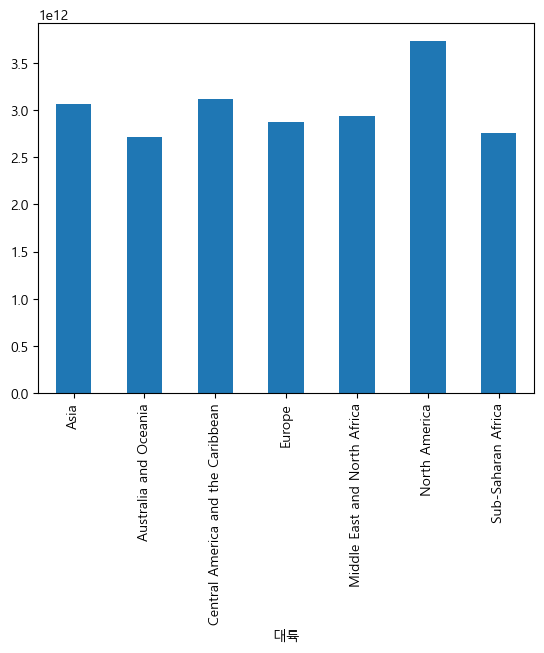

In [17]:
df.groupby('대륙').mean()['총이윤'].plot.bar()


<Axes: xlabel='대륙'>

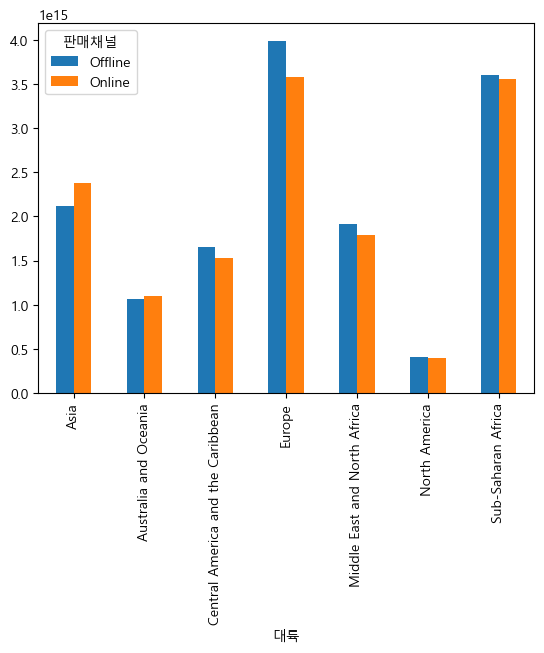

In [18]:
pd.pivot_table(df,
               index='대륙',
               columns='판매채널',
               values='총이윤',
               aggfunc='sum'

).plot.bar()

C:\Users\dgh06\AppData\Local\Temp\ipykernel_30244\2531438881.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['대륙','판매채널']).sum()['총이윤'].plot.bar()


<Axes: xlabel='대륙,판매채널'>

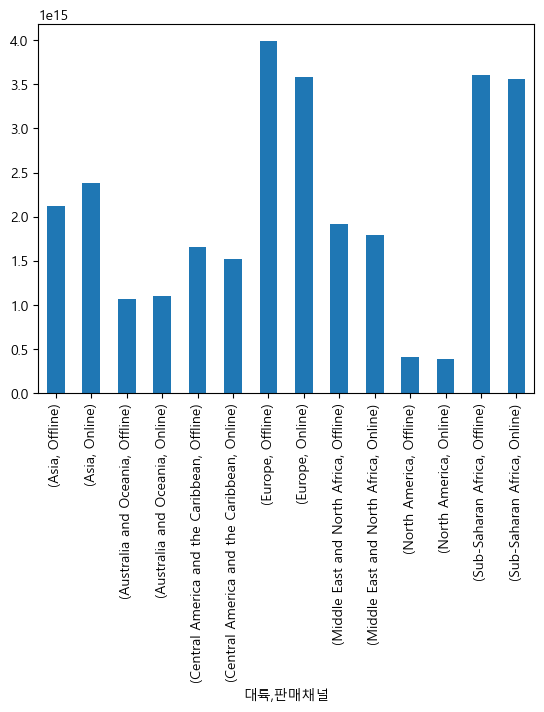

In [19]:
df.groupby(['대륙','판매채널']).sum()['총이윤'].plot.bar()


# 인덱스를 이동하는 함수
> shift(n)
- 인덱스를 n만큼 전으로 이동
- n=1이 가본 값: 바로 전의 인덱스의 값을 가지고 온다.
- 다음의 인덱스의 값을 가지고 오려면? n=-1

# 값의 차이를 출력하는 함수
> diff(periods= n)
- 바로 전의 인덱스의 값과의 차이를 출력
- periods의 가본값은 1, shift와 마찬가지로 행의 수를 지정

# 결측치를 다른 값을 대체하는 함수
> fillna(n, method =? )
- n을 지정하면 해당하는 값으로 결측치가 대체
- method 속성: ffill, bfill
    - ffill : 전 행의 값이 존재하면, 그 값으로 대체
    - bfill : 후 행의 값이 존재하면, 그 값으로 대체

In [20]:
corona=pd.read_csv("../csv/corona.csv",index_col=[0])

In [21]:
corona['accExamCnt']=corona['accExamCnt'].fillna(method='bfill')

> apply()
- 데이터프레임에서 각 항목들의 데이터를 변환 시켜주는 함수
- 표의 형태의 각 셀의 값 -> apply(연산) -> 연산 안에 각 셀의 값을 넣어서 변환
> lambda()
- 함수의 선언과 동시에 호출을 하는 함수
> map()
- 리스트, 튜플의 형태의 ㅔㄷ이터의 각 항목들을 변환 시켜주는 함수


In [22]:
corona['accDefRate']= corona['accDefRate'].fillna(method='bfill')

In [23]:
# apply를 사용하여 새로운 파생변수(H/L)에 accDefRate의 값이 1.55보다 크면 High 아니면 Low의 값을 대입

In [24]:
# case1: apply + 일반함수
def change(x):
    if x>1.55:
        return 'High'
    else:
        return 'Low'
corona["H/L"]=corona["accDefRate"].apply(change)
corona['H/L'].value_counts()

Low     420
High    400
Name: H/L, dtype: int64

In [25]:
# apply + lambda
# if문을 한줄로 사용: 창인경우 값 if 조건식 else 거짓인 경우 값

corona['accDefRate'].apply(lambda x: "High" if x>1.55 else 'Low').value_counts()

Low     420
High    400
Name: accDefRate, dtype: int64

# 데이터프레임의 결합
> concat() - 유니온 결합
- axis속성 0,1 행을 결합을 할지, 열을 결합을 할지 지정
- 단순하게 데이터프레임을 결합
> merge()  - 조인 결합
- 특정한 조건을 기준으로 하여 데이터프레임을 결합
- on 속성에서 합쳐질 데이터프레임의 조건을 넣어주는 부분(컬럼의 이름)
- 조건에 맞는 컬럼의 값을 넣어준다
- how 속성
    - left  : 왼쪽에 있는 데이터프레임을 기준으로 결함
    - right : 오른쪽에 있는 데이터프레임을 기준으로 결합
    - inner : 두 데이터프레임의 교집합
    - outer : 두 데이터프레임의 합집합


In [26]:
# csv폴더 안에 num_3 폴더에 잇는 파일들을 로드하여 데이터프레임 결합
# 4개의 파알 모두 조인결합

In [27]:
d1=pd.read_csv("../csv/num_3/campaign_master.csv")
d2=pd.read_csv("../csv/num_3/class_master.csv")
d3=pd.read_csv("../csv/num_3/customer_master.csv")
d4=pd.read_csv("../csv/num_3/use_log.csv")

In [28]:
print(d1.columns)
print(d2.columns)
print(d3.columns)
print(d4.columns)

Index(['campaign_id', 'campaign_name'], dtype='object')
Index(['class', 'class_name', 'price'], dtype='object')
Index(['customer_id', 'name', 'class', 'gender', 'start_date', 'end_date',
       'campaign_id', 'is_deleted'],
      dtype='object')
Index(['log_id', 'customer_id', 'usedate'], dtype='object')


In [29]:
N1=pd.merge(d1,d3,on='campaign_id',how='inner')
N2=pd.merge(N1,d2,on='class',how='inner')
data=pd.merge(N2,d4,on='customer_id',how='inner')
data

,campaign_id,campaign_name,customer_id,name,class,gender,start_date,end_date,is_deleted,class_name,price,log_id,usedate
0,CA1,2_일반,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,0,0_종일,10500,L00000049014216,2018-04-04
1,CA1,2_일반,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,0,0_종일,10500,L00000049018989,2018-04-13
2,CA1,2_일반,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,0,0_종일,10500,L00000049030118,2018-05-03
3,CA1,2_일반,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,0,0_종일,10500,L00000049031667,2018-05-06
4,CA1,2_일반,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,0,0_종일,10500,L00000049033751,2018-05-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,CA3,1_입회비무료,OA426023,XXXX,C02,F,2018-12-14 00:00:00,NaN,0,1_주간,7500,L00000049200630,2019-03-14
197424,CA3,1_입회비무료,OA426023,XXXX,C02,F,2018-12-14 00:00:00,NaN,0,1_주간,7500,L00000049201168,2019-03-15
197425,CA3,1_입회비무료,OA426023,XXXX,C02,F,2018-12-14 00:00:00,NaN,0,1_주간,7500,L00000049204337,2019-03-21
197426,CA3,1_입회비무료,OA426023,XXXX,C02,F,2018-12-14 00:00:00,NaN,0,1_주간,7500,L00000049204848,2019-03-22


# 시계열 데이터
> to_datetime(데이터,format=)
- 해당하는 데이터르르 시계열 데이터로 변환
- format의 속성은 변경 시키려는 데이터의 구성을 대입

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197428 entries, 0 to 197427
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   campaign_id    197428 non-null  object
 1   campaign_name  197428 non-null  object
 2   customer_id    197428 non-null  object
 3   name           197428 non-null  object
 4   class          197428 non-null  object
 5   gender         197428 non-null  object
 6   start_date     197428 non-null  object
 7   end_date       29474 non-null   object
 8   is_deleted     197428 non-null  int64 
 9   class_name     197428 non-null  object
 10  price          197428 non-null  int64 
 11  log_id         197428 non-null  object
 12  usedate        197428 non-null  object
dtypes: int64(2), object(11)
memory usage: 21.1+ MB


In [31]:
# start_date컬럼의 데이터의 타입을 시계열 변경
# 20191월1일 이후 데이터만 출력


In [32]:
data['start_date']=pd.to_datetime(data['start_date'])
data.sort_values('start_date',inplace=True)
data.loc[data['start_date']>='2019-01-01']

,campaign_id,campaign_name,customer_id,name,class,gender,start_date,end_date,is_deleted,class_name,price,log_id,usedate
71387,CA1,2_일반,IK283032,XXXX,C01,M,2019-01-01,NaN,0,0_종일,10500,L00000049162103,2019-01-03
71386,CA1,2_일반,IK283032,XXXX,C01,M,2019-01-01,NaN,0,0_종일,10500,L00000049161118,2019-01-01
71385,CA1,2_일반,OA106766,XXXXX,C01,F,2019-01-01,NaN,0,0_종일,10500,L00000049209574,2019-03-31
71384,CA1,2_일반,OA106766,XXXXX,C01,F,2019-01-01,NaN,0,0_종일,10500,L00000049206905,2019-03-26
71379,CA1,2_일반,OA106766,XXXXX,C01,F,2019-01-01,NaN,0,0_종일,10500,L00000049195897,2019-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185934,CA1,2_일반,IK692635,XXXXX,C02,F,2019-03-15,NaN,0,1_주간,7500,L00000049203747,2019-03-20
185935,CA1,2_일반,IK692635,XXXXX,C02,F,2019-03-15,NaN,0,1_주간,7500,L00000049204803,2019-03-22
185936,CA1,2_일반,IK692635,XXXXX,C02,F,2019-03-15,NaN,0,1_주간,7500,L00000049205312,2019-03-23
185937,CA1,2_일반,IK692635,XXXXX,C02,F,2019-03-15,NaN,0,1_주간,7500,L00000049206326,2019-03-25


1. 이용 내역
2. 파생변수 2개 생성
3. weekday 요일 파생변수
4. 년월 파생변수 하나 생성
5. 요일별 이용 여부를 계산

In [33]:
data['usedate']=pd.to_datetime(data['usedate'],format="%Y-%m-%d")

In [34]:
for i in data.index:
    #print(i)
    data.loc[i,'weekday']=data['usedate'][i].weekday()
#data['weekday'].value_counts()
data

#data['weekday']=data['usedate'].dt.weekday()

,campaign_id,campaign_name,customer_id,name,class,gender,start_date,end_date,is_deleted,class_name,price,log_id,usedate,weekday
0,CA1,2_일반,OA832399,XXXX,C01,F,2015-05-01,NaN,0,0_종일,10500,L00000049014216,2018-04-04,2.0
150509,CA1,2_일반,PL928545,XXXXXX,C02,F,2015-05-01,NaN,0,1_주간,7500,L00000049068359,2018-07-11,2.0
150508,CA1,2_일반,PL928545,XXXXXX,C02,F,2015-05-01,NaN,0,1_주간,7500,L00000049067825,2018-07-10,1.0
150507,CA1,2_일반,PL928545,XXXXXX,C02,F,2015-05-01,NaN,0,1_주간,7500,L00000049064670,2018-07-04,2.0
150506,CA1,2_일반,PL928545,XXXXXX,C02,F,2015-05-01,NaN,0,1_주간,7500,L00000049064139,2018-07-03,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185934,CA1,2_일반,IK692635,XXXXX,C02,F,2019-03-15,NaN,0,1_주간,7500,L00000049203747,2019-03-20,2.0
185935,CA1,2_일반,IK692635,XXXXX,C02,F,2019-03-15,NaN,0,1_주간,7500,L00000049204803,2019-03-22,4.0
185936,CA1,2_일반,IK692635,XXXXX,C02,F,2019-03-15,NaN,0,1_주간,7500,L00000049205312,2019-03-23,5.0
185937,CA1,2_일반,IK692635,XXXXX,C02,F,2019-03-15,NaN,0,1_주간,7500,L00000049206326,2019-03-25,0.0


In [35]:
data['년월']=data['usedate'].apply(lambda x: x.strftime (format="%Y-%m"))
# data['년월]= data['usedate'].dt.strftiome("%Y-%m")

In [36]:
data

,campaign_id,campaign_name,customer_id,name,class,gender,start_date,end_date,is_deleted,class_name,price,log_id,usedate,weekday,년월
0,CA1,2_일반,OA832399,XXXX,C01,F,2015-05-01,NaN,0,0_종일,10500,L00000049014216,2018-04-04,2.0,2018-04
150509,CA1,2_일반,PL928545,XXXXXX,C02,F,2015-05-01,NaN,0,1_주간,7500,L00000049068359,2018-07-11,2.0,2018-07
150508,CA1,2_일반,PL928545,XXXXXX,C02,F,2015-05-01,NaN,0,1_주간,7500,L00000049067825,2018-07-10,1.0,2018-07
150507,CA1,2_일반,PL928545,XXXXXX,C02,F,2015-05-01,NaN,0,1_주간,7500,L00000049064670,2018-07-04,2.0,2018-07
150506,CA1,2_일반,PL928545,XXXXXX,C02,F,2015-05-01,NaN,0,1_주간,7500,L00000049064139,2018-07-03,1.0,2018-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185934,CA1,2_일반,IK692635,XXXXX,C02,F,2019-03-15,NaN,0,1_주간,7500,L00000049203747,2019-03-20,2.0,2019-03
185935,CA1,2_일반,IK692635,XXXXX,C02,F,2019-03-15,NaN,0,1_주간,7500,L00000049204803,2019-03-22,4.0,2019-03
185936,CA1,2_일반,IK692635,XXXXX,C02,F,2019-03-15,NaN,0,1_주간,7500,L00000049205312,2019-03-23,5.0,2019-03
185937,CA1,2_일반,IK692635,XXXXX,C02,F,2019-03-15,NaN,0,1_주간,7500,L00000049206326,2019-03-25,0.0,2019-03


In [43]:
use_weekday=data.groupby(['customer_id','년월','weekday'], as_index=False).count()[['customer_id','년월','weekday','log_id']]

In [45]:
use_weekday.rename(columns={'log_id':'count'},inplace=True)

In [46]:
use_weekday.head(3)

,customer_id,년월,weekday,count
0,AS002855,2018-04,5.0,4
1,AS002855,2018-05,2.0,1
2,AS002855,2018-05,5.0,4


In [47]:
# 각 회원별 가장 많은 count를 가지는 요일을 출력

use_weekday.groupby('customer_id').max()[['weekday','count']]

,weekday,count
customer_id,,
AS002855,6.0,5
AS008805,6.0,4
AS009013,0.0,2
AS009373,6.0,5
AS015233,6.0,5
...,...,...
TS995853,6.0,5
TS998593,6.0,5
TS999079,6.0,5


# 함수
- 행동
- 반복적인 코드를 실행이 되야되는 경우 코드를 반복해서 사용하면 코드 라인이 증가하고 가독성이 하락
- 코드가 길어짐으로써 에러가 발생할 확률 증가
- def 키워드를 이용하여 함수를 선언

In [48]:
# 함수를 생성
# 인자의 값이 숫자의 형태가 아니면 숫자의 형태로 아니다
# 숫자의 경우 짝수이면 짝수
# 홀수이면 홀수 출력

In [69]:
def _func(x):
    if type(x) == float:
        return "인자의 타입은 실수이다"
    
    if type(x) != int:
        return "숫자의 형태가 아니다"
    else :
        if x%2==1:
            return '홀수'
        else:
            return '짝수'
        

In [72]:
# 함수 생성
# 매개변수 2개
# 두 매개변수 사이 값들의 합 리턴
# 3,5 -? 3+4+5 ->!2리턴
# 두 매개변수의 대소관계는 상관없이 사이의 값들이 합

In [75]:
def _sum(x,y):
    sum=0
    if y>x:
        for i in range(x,y+1,1):
            sum+=i
        return sum
    else:
        for i in range(y,x+1,1):
            sum+=i
        return sum

In [81]:
def sum_2(x,y):
    sum=0
    for i in range(min(x,y),max(x,y)+1,1):
        sum+=i
    return sum


In [83]:
sum_2(5,4)

9

In [84]:
# 함수 생성
# 매개변수 1개
# 인자값이 12345
# 1+2+3+4+5출력이 되도록 함수를 구성

In [107]:
def func(x):
    sum=0
    while x//10>0:
        sum+=x%10
        x=x//10
    sum+=x
        
    return sum
    

In [105]:
def func_1(x):
    sum=0
    for i in str(x):
        sum+=int(i)
    return sum

In [116]:
def func_2(x):

    result=sum(map(int,str(x)))
    return result

func_2(12345)

15

In [108]:
func(1234)

10

In [106]:
func_1(1234)

10